<a href="https://colab.research.google.com/github/rlagusgh0223/Data/blob/main/06_%EB%B3%B5%EC%9E%A1%ED%95%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%91%9C%ED%98%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 06-1 객체지향 API로 그래프 꾸미기

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

pyplot 방식으로 그래프 그리기

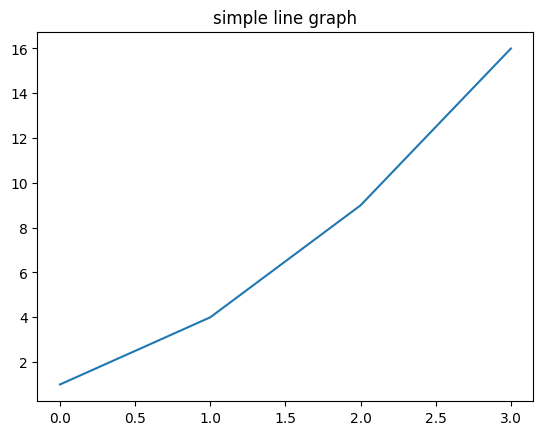

In [2]:
# plot() 함수에 리스트 형태로 데이터를 전달하고,
# title() 함수에는 그래프 제목을 넣어 그려 보기
plt.plot([1, 4, 9, 16])
plt.title('simple line graph')
plt.show()

객체지향 API 방식으로 그래프 그리기

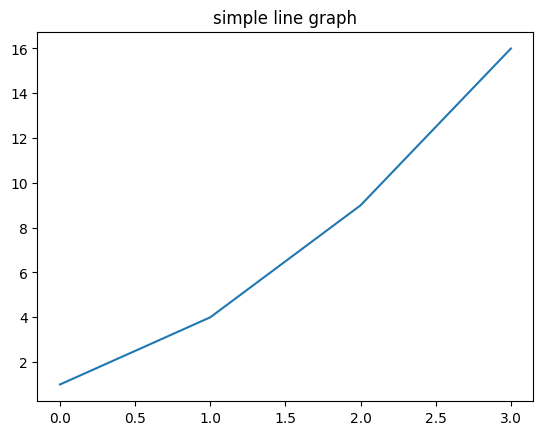

In [3]:
fig, ax = plt.subplots()  # 하나의 Axes 객체를 가지는 피겨를 생성
ax.plot([1, 4, 9, 16])
ax.set_title('simple line graph')
fig.show()

위의 어떤 방식으로든 그래프를 그려도 되나  
복잡한 그래프를 그리는 경우에는 **객체지향 방식**을 사용하는 것이 좋다  
(특히 하나의 피겨에 여러 개의 서브플롯을 추가하는 경우)

### 그래프에 한글 출력하기

In [4]:
import sys
if 'google.colab' in sys.modules:
  !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections
  # 나눔 폰트 설치
  !sudo apt-get -qq -y install fonts-nanum
  import matplotlib.font_manager as fm
  font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
  for fpath in font_files:
    fm.fontManager.addfont(fpath)

Selecting previously unselected package fonts-nanum.
(Reading database ... 121920 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

폰트 지정하기(1) : font.family 속성

In [6]:
plt.rcParams['font.family']

['sans-serif']

In [9]:
# 나눔고딕 폰트로 설정
plt.rcParams['font.family'] = 'NanumGothic'

In [10]:
plt.rcParams['font.family']

['NanumGothic']

폰트 지정하기(2) : rc()함수

In [11]:
# 나눔바른고딕 폰트로 설정
plt.rc('font', family='NanumBarunGothic', size=11)

In [12]:
plt.rcParams['font.family'], plt.rcParams['font.size']

(['NanumBarunGothic'], 11.0)

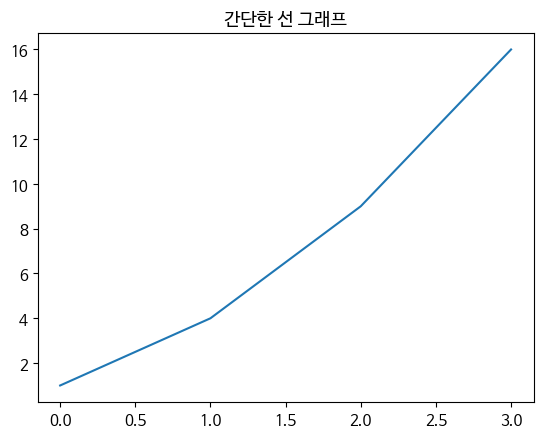

In [13]:
plt.plot([1, 4, 9, 16])
plt.title('간단한 선 그래프')
plt.show()

In [14]:
# 원래대로 되돌리기
plt.rc('font', size=10)

### 출판사별 발행 도서 개수 산점도 그리기

In [15]:
import gdown
gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

import pandas as pd
ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 95.9MB/s]


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


고유한 출판사 목록 만들기

In [16]:
top30_pubs = ns_book7['출판사'].value_counts()[:30]
top30_pubs

출판사
문학동네           4410
민음사            3349
김영사            3246
웅진씽크빅          3227
시공사            2685
창비             2469
문학과지성사         2064
위즈덤하우스         1981
학지사            1877
한울             1553
한국학술정보         1496
열린책들           1491
살림출판사          1479
한길사            1460
博英社            1458
커뮤니케이션북스       1445
지식을만드는지식       1390
자음과모음          1364
비룡소            1331
랜덤하우스코리아       1314
넥서스            1310
황금가지           1101
길벗             1094
시그마프레스         1063
현암사            1054
다산북스           1046
집문당            1038
책세상            1037
한국문화사          1028
북이십일 21세기북스    1026
Name: count, dtype: int64

In [17]:
top30_pubs_idx = ns_book7['출판사'].isin(top30_pubs.index)
top30_pubs_idx

0          True
1         False
2         False
3         False
4          True
          ...  
376765    False
376766    False
376767     True
376768    False
376769    False
Name: 출판사, Length: 376770, dtype: bool

In [18]:
# 상위 30개 출판사의 발행 도서 개수가 총 몇 개인지 계산
top30_pubs_idx.sum()

51886

In [19]:
# 무작위로 1000개의 데이터 선택
ns_book8 = ns_book7[top30_pubs_idx].sample(1000, random_state=42)
ns_book8.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
141760,155786,제갈량 문집,제갈량 지음 ;조영래 옮김,지식을만드는지식,2012,9788966805785,NaN,0,10,808,1,2,2013-04-10
249855,268595,존 레넌을 찾아서,토니 파슨스 지음;이은정 옮김,시공사,2007,9788952750419,NaN,0,NaN,843,1,18,2007-12-14
129347,142802,요리사 & 쇼핑호스트 :생활과학 계열·예체능 계열,와이즈멘토 글 ;김성희 그림,김영사,2013,9788934959854,9788934959717,7,14,321.55,1,3,2013-12-09
349194,371975,임정섭의 글쓰기 훈련소,임정섭 지음,다산북스,2017,9791130614472,NaN,NaN,NaN,NaN,1,0,1970-01-01
46734,51748,초한지 :이문열의 史記 이야기,지은이: 이문열,민음사,2017,9788937481659,9788937481581,0,7,813.6,1,9,2018-07-02


산점도 그리기

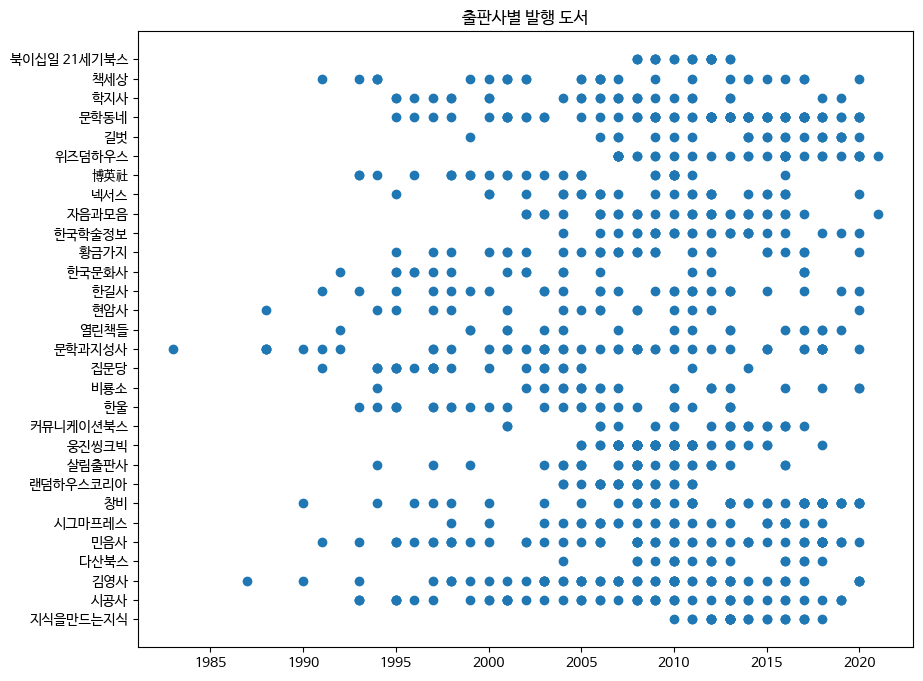

In [20]:
# 해당 연도에 어떤 출판사의 도서가 발행되었는지 알려주는 산점도
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(ns_book8['발행년도'], ns_book8['출판사'])
ax.set_title('출판사별 발행 도서')
fig.show()

값에 따라 마커 크기를 다르게 나타내기

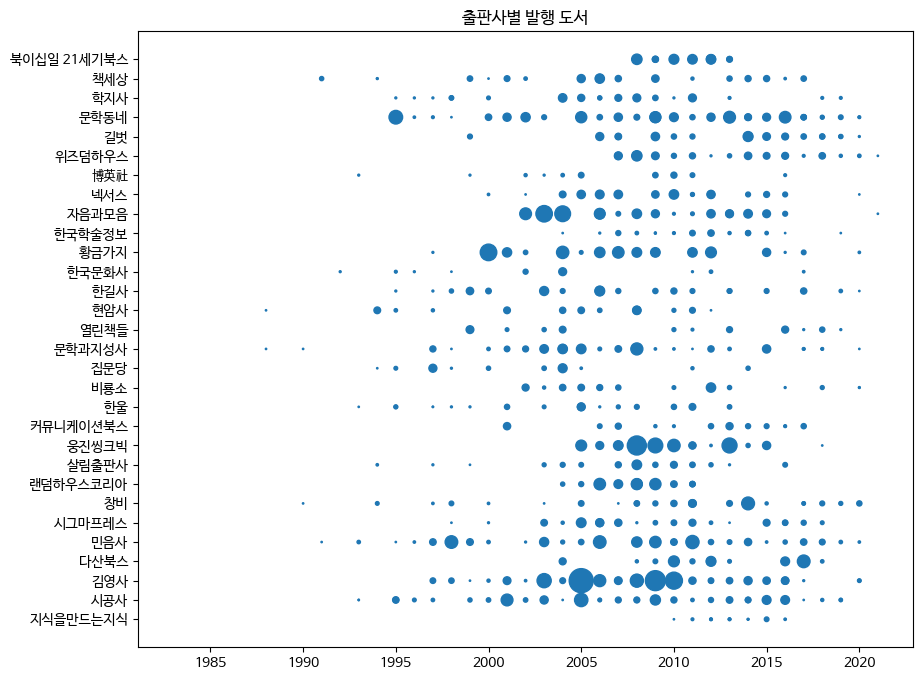

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(ns_book8['발행년도'], ns_book8['출판사'], s=ns_book8['대출건수'])
ax.set_title('출판사별 발행 도서')
fig.show()

마커 꾸미기

linewidths  # 마커 테두리 선 두께 바꾸기

edgecolors  # 마커 테두리 색 바꾸기

alpha  # 투명도 조절하기

c  # 산점도 색 바꾸기

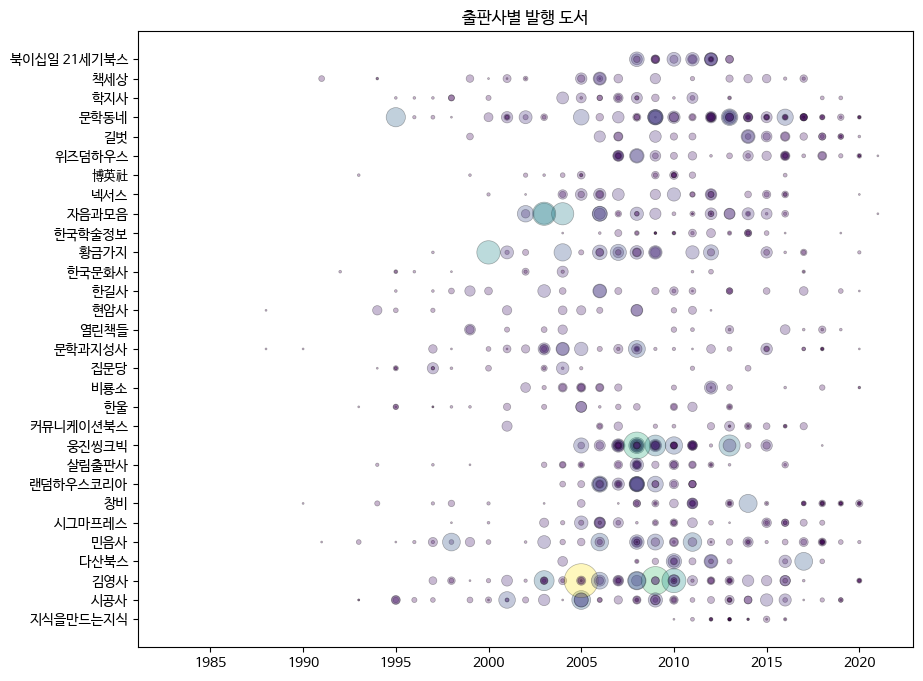

In [29]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(ns_book8['발행년도'], ns_book8['출판사'],\
           linewidths=0.5,\
           edgecolors = 'k',\
           alpha = 0.3,\
           s = ns_book8['대출건수']*2,\
           c = ns_book8['대출건수'])
ax.set_title('출판사별 발행 도서')
fig.show()

값에 따라 색상 표현하기 : 컬러맵

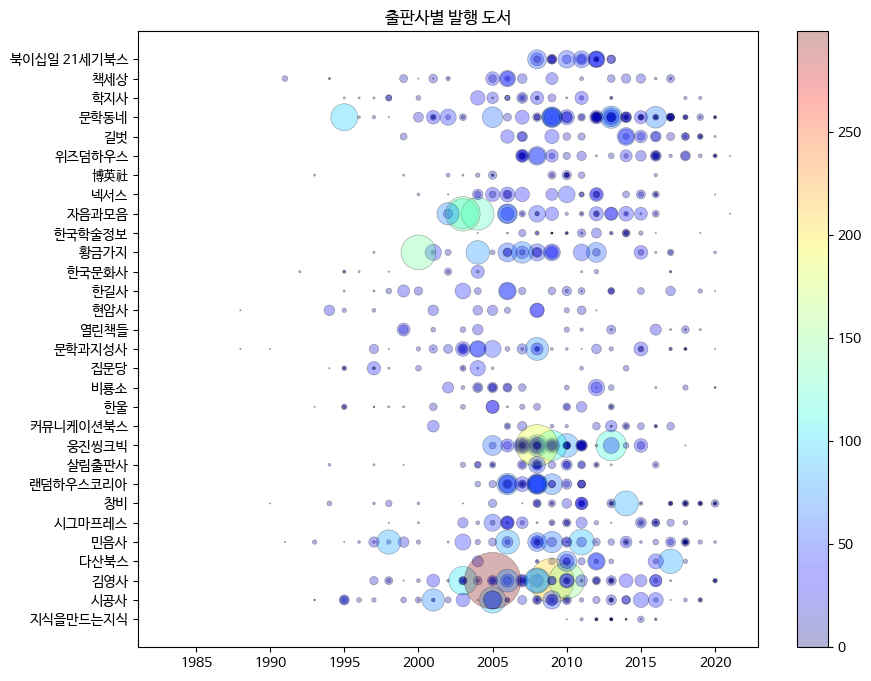

In [31]:
fig, ax = plt.subplots(figsize=(10, 8))
sc = ax.scatter(ns_book8['발행년도'], ns_book8['출판사'],\
                linewidth=0.5, edgecolors='k', alpha=0.3,\
                s=ns_book8['대출건수']**1.3, c=ns_book8['대출건수'], cmap='jet')
ax.set_title('출판사별 발행 도서')
fig.colorbar(sc)
fig.show()

# 06-2 맷플롯립의 고급 기능 배우기

In [32]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['figure.dpi'] = 100

### 하나의 피겨에 여러 개의 선 그래프 그리기

In [33]:
# 상위 30위으 출판사 목록
top30_pubs = ns_book7['출판사'].value_counts()[:30]
top30_pubs_idx = ns_book7['출판사'].isin(top30_pubs.index)

In [34]:
ns_book9 = ns_book7[top30_pubs_idx][['출판사', '발행년도', '대출건수']]

In [35]:
# 출판사마다 연도별 발생건수를 나타내기 위해 같은 연도의 대출건수 합쳐준다
ns_book9 = ns_book9.groupby(by=['출판사', '발행년도']).sum()

In [36]:
ns_book9 = ns_book9.reset_index()  # 인덱스 초기화
ns_book9[ns_book9['출판사'] == '황금가지'].head()

,출판사,발행년도,대출건수
858,황금가지,1995,0
859,황금가지,1996,67
860,황금가지,1997,116
861,황금가지,1998,526
862,황금가지,1999,505


선 그래프 2개 그리기

In [37]:
line1 = ns_book9[ns_book9['출판사'] == '황금가지']
line2 = ns_book9[ns_book9['출판사'] == '비룡소']

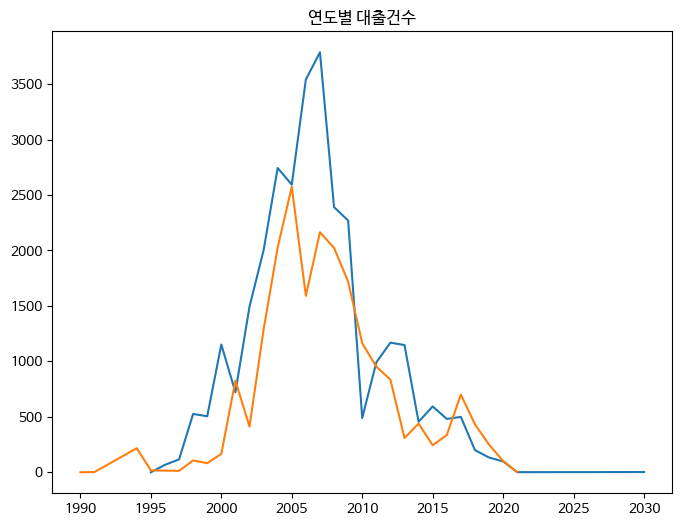

In [39]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(line1['발행년도'], line1['대출건수'])
ax.plot(line2['발행년도'], line2['대출건수'])
ax.set_title('연도별 대출건수')
fig.show()

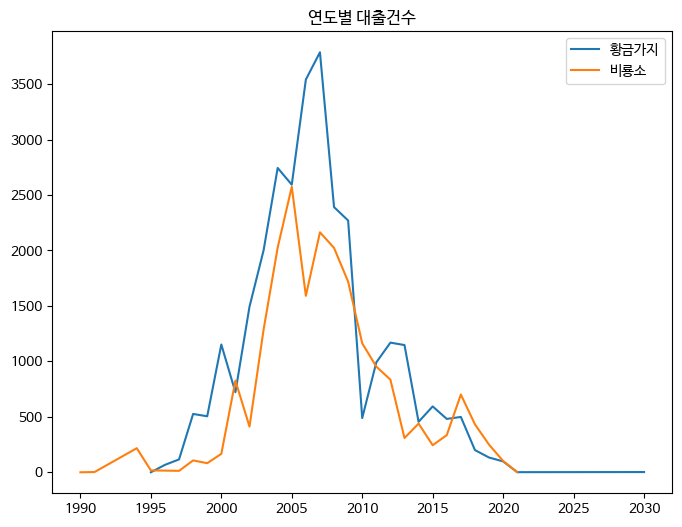

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(line1['발행년도'], line1['대출건수'], label='황금가지')
ax.plot(line2['발행년도'], line2['대출건수'], label='비룡소')
ax.set_title('연도별 대출건수')
ax.legend()  # 범례 추가
fig.show()

선 그래프 5개 그리기

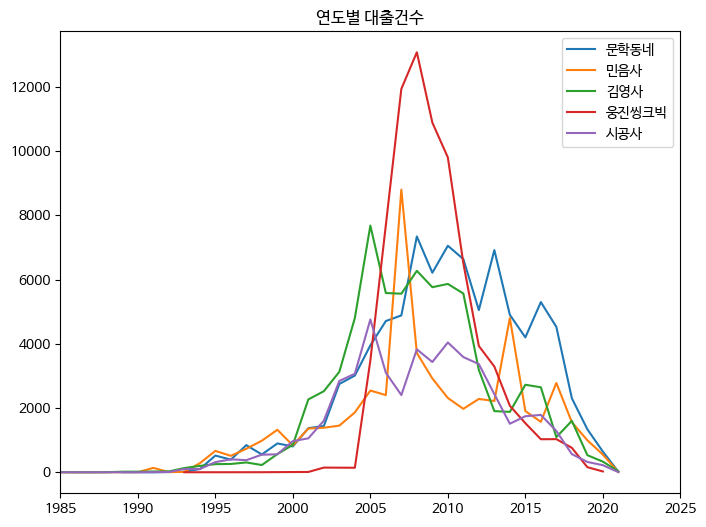

In [48]:
fig, ax = plt.subplots(figsize=(8, 6))
for pub in top30_pubs.index[:5]:
  line = ns_book9[ns_book9['출판사'] == pub]  # 상위 5개 출판사
  ax.plot(line['발행년도'], line['대출건수'], label=pub)
ax.set_title('연도별 대출건수')
ax.legend()  # 범례 추가
ax.set_xlim(1985, 2025)  # 1985부터 2025까지 x구 범위 선택
fig.show()

스택 영역 그래프

In [49]:
# pivot_table()메서드로 각 '발행년도' 열의 값을 열로 바꾸기
ns_book10 = ns_book9.pivot_table(index='출판사', columns='발행년도')
ns_book10.head()

대출건수                                               ...                  \
발행년도 1947 1974 1975 1976 1977 1978 1979 1980 1981 1982  ...    2013    2014   
출판사                                                     ...                   
博英社   0.0  NaN  0.0  NaN  0.0  NaN  NaN  NaN  NaN  NaN  ...     NaN   118.0   
길벗    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1162.0  1619.0   
김영사   NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  0.0  ...  1905.0  1881.0   
넥서스   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1828.0  1429.0   
다산북스  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1100.0  1361.0   

                                                               
발행년도    2015    2016    2017    2018   2019   2020  2021 2030  
출판사                                                            
博英社     57.0    47.0     2.0     8.0    NaN    1.0   NaN  NaN  
길벗    1410.0  1597.0  1626.0  1004.0  773.0  292.0  12.0  NaN  
김영사   2726.0  2647.0  1094.0  1602.0  533.0  332.0  30.0  NaN  
넥서스    765.0  1146.0   932.0   565.0   90.0   15.0   0.0  NaN  
다산북스  1321.0  1137.0  1249.0   773.0  530.0  127.0  13.0  NaN  

[5 rows x 50 columns]

In [50]:
# columns속성 확인
ns_book10.columns[:10]

MultiIndex([('대출건수', 1947),
            ('대출건수', 1974),
            ('대출건수', 1975),
            ('대출건수', 1976),
            ('대출건수', 1977),
            ('대출건수', 1978),
            ('대출건수', 1979),
            ('대출건수', 1980),
            ('대출건수', 1981),
            ('대출건수', 1982)],
           names=[None, '발행년도'])

In [51]:
# '발행년도' 열을 리스트 형태로 바꾸기
top10_pubs = top30_pubs.index[:10]
year_cols = ns_book10.columns.get_level_values(1)

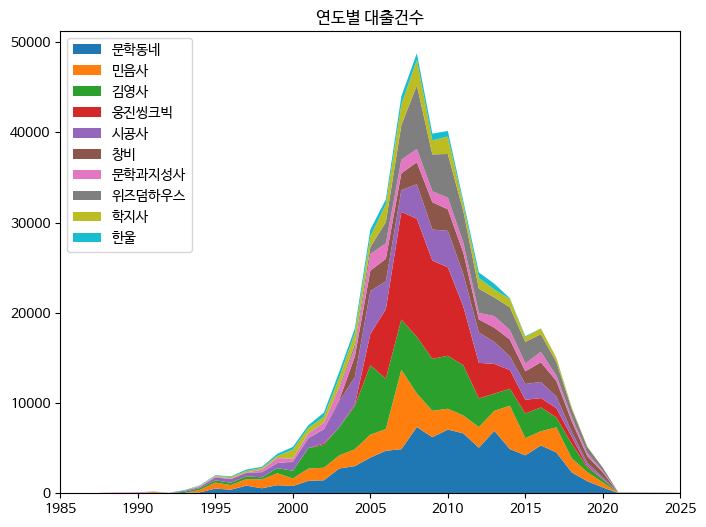

In [52]:
# stackplot()메서드로 스택 영역 그래프 그리기
fig, ax = plt.subplots(figsize=(8, 6))
ax.stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0), labels=top10_pubs)
ax.set_title('연도별 대출건수')
ax.legend(loc='upper left')  # 범례를 왼쪽 상단에 표시
ax.set_xlim(1985, 2025)
fig.show()

### 하나의 피겨에 여러 개의 막대 그래프 그리기

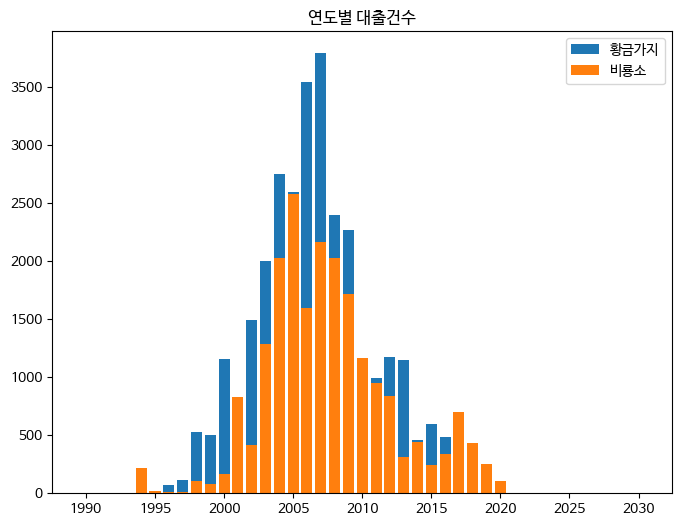

In [54]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(line1['발행년도'], line1['대출건수'], label='황금가지')
ax.bar(line2['발행년도'], line2['대출건수'], label='비룡소')
ax.set_title('연도별 대출건수')
ax.legend()
fig.show()

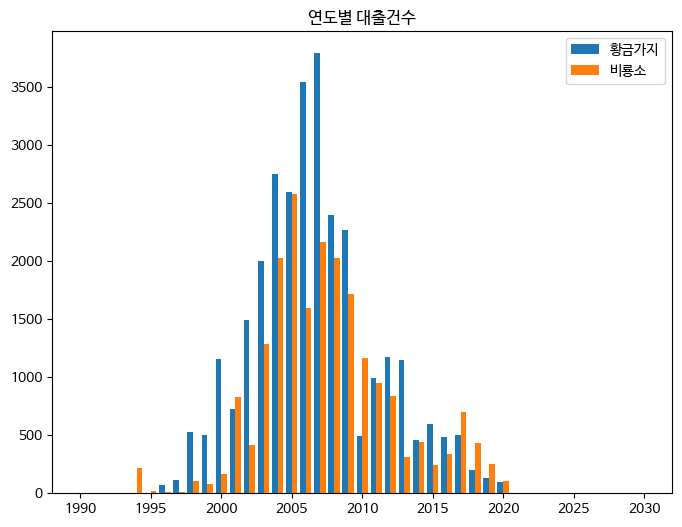

In [55]:
# 나란히 옆으로 그리기
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(line1['발행년도']-0.2, line1['대출건수'], width=0.4, label='황금가지')
ax.bar(line2['발행년도']+0.2, line2['대출건수'], width=0.4, label='비룡소')
ax.set_title('연도별 대출건수')
ax.legend()
fig.show()

스택 막대 그래프

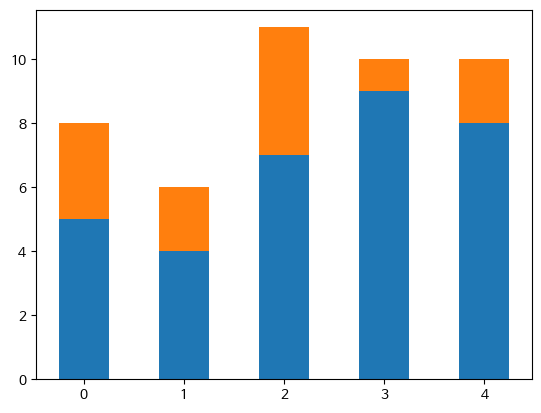

In [56]:
height1 = [5, 4, 7, 9, 8]
height2 = [3, 2, 4, 1, 2]

plt.bar(range(5), height1, width=0.5)
plt.bar(range(5), height2, bottom=height1, width=0.5)
plt.show()

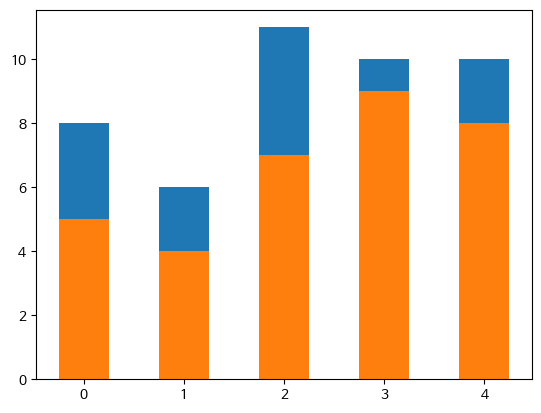

In [58]:
# 그래프를 그리기 전에 막대의 길이를 누적해놓고 이 값으로 막대 그래프를 그리는 방법
height3 = [a+b for a, b in zip(height1, height2)]

plt.bar(range(5), height3, width=0.5)
plt.bar(range(5), height1, width=0.5)
plt.show()

데이터값 누적하여 그리기

In [59]:
# 상위 다섯 개 출판사의 2013 ~ 2020 대출건수
ns_book10.loc[top10_pubs[:5], ('대출건수',2013):('대출건수',2020)]

대출건수                                                       
발행년도     2013    2014    2015    2016    2017    2018    2019   2020
출판사                                                                 
문학동네   6919.0  4904.0  4201.0  5301.0  4529.0  2306.0  1340.0  645.0
민음사    2219.0  4805.0  1907.0  1571.0  2782.0  1559.0   998.0  552.0
김영사    1905.0  1881.0  2726.0  2647.0  1094.0  1602.0   533.0  332.0
웅진씽크빅  3293.0  2072.0  1529.0  1029.0  1032.0   762.0   159.0   26.0
시공사    2433.0  1512.0  1745.0  1787.0  1287.0   566.0   322.0  221.0

In [61]:
ns_book10.loc[top10_pubs[:5], ('대출건수',2013):('대출건수',2020)].cumsum()

대출건수                                                            
발행년도      2013     2014     2015     2016     2017    2018    2019    2020
출판사                                                                       
문학동네    6919.0   4904.0   4201.0   5301.0   4529.0  2306.0  1340.0   645.0
민음사     9138.0   9709.0   6108.0   6872.0   7311.0  3865.0  2338.0  1197.0
김영사    11043.0  11590.0   8834.0   9519.0   8405.0  5467.0  2871.0  1529.0
웅진씽크빅  14336.0  13662.0  10363.0  10548.0   9437.0  6229.0  3030.0  1555.0
시공사    16769.0  15174.0  12108.0  12335.0  10724.0  6795.0  3352.0  1776.0

In [62]:
ns_book12 = ns_book10.loc[top10_pubs].cumsum()

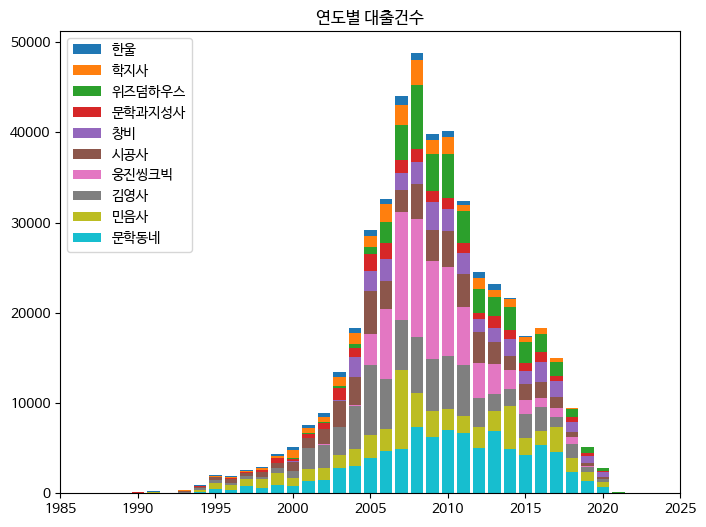

In [63]:
fig, ax = plt.subplots(figsize=(8,6))
# 가장 큰 막대부터 그린다
for i in reversed(range(len(ns_book12))):
  bar = ns_book12.iloc[i]  # 행 추출
  label = ns_book12.index[i]  # 출판사 이름 추출
  ax.bar(year_cols, bar, label=label)
ax.set_title('연도별 대출건수')
ax.legend(loc='upper left')
ax.set_xlim(1985, 2025)
fig.show()

### 원 그래프 그리기

In [64]:
data = top30_pubs[:10]  # 상위 10개 출판사의 도서 개수를 선택하여 저장
labels = top30_pubs.index[:10]  # 상위 10개 출판사의 인덱스 저장

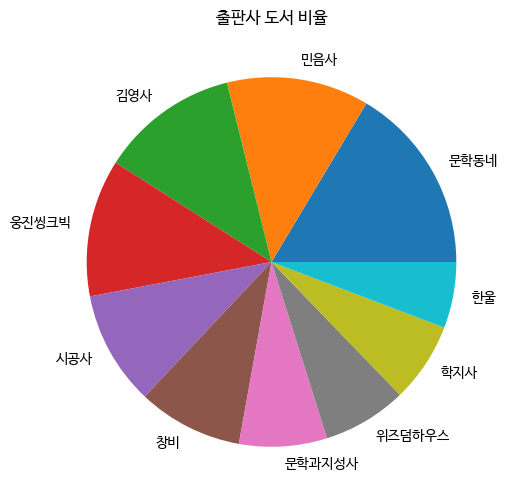

In [65]:
# 3시 방향부터 반시계방향으로 그려진다
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(data, labels=labels)
ax.set_title('출판사 도서 비율')
fig.show()

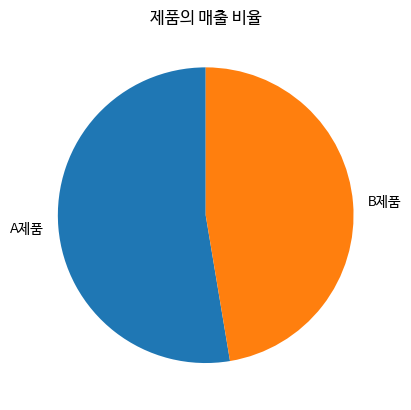

In [67]:
# 원 그래프를 12시 방향부터 그림
plt.pie([10, 9], labels=['A제품', 'B제품'], startangle=90)
plt.title('제품의 매출 비율')
plt.show()

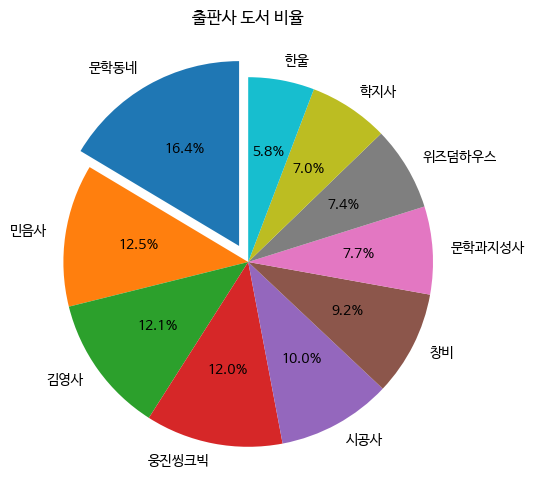

In [68]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(data, labels=labels, startangle=90, autopct='%.1f%%', explode=[0.1]+[0]*9)
ax.set_title('출판사 도서 비율')
fig.show()

### 여러 종류의 그래프가 있는 서브플롯 그리기

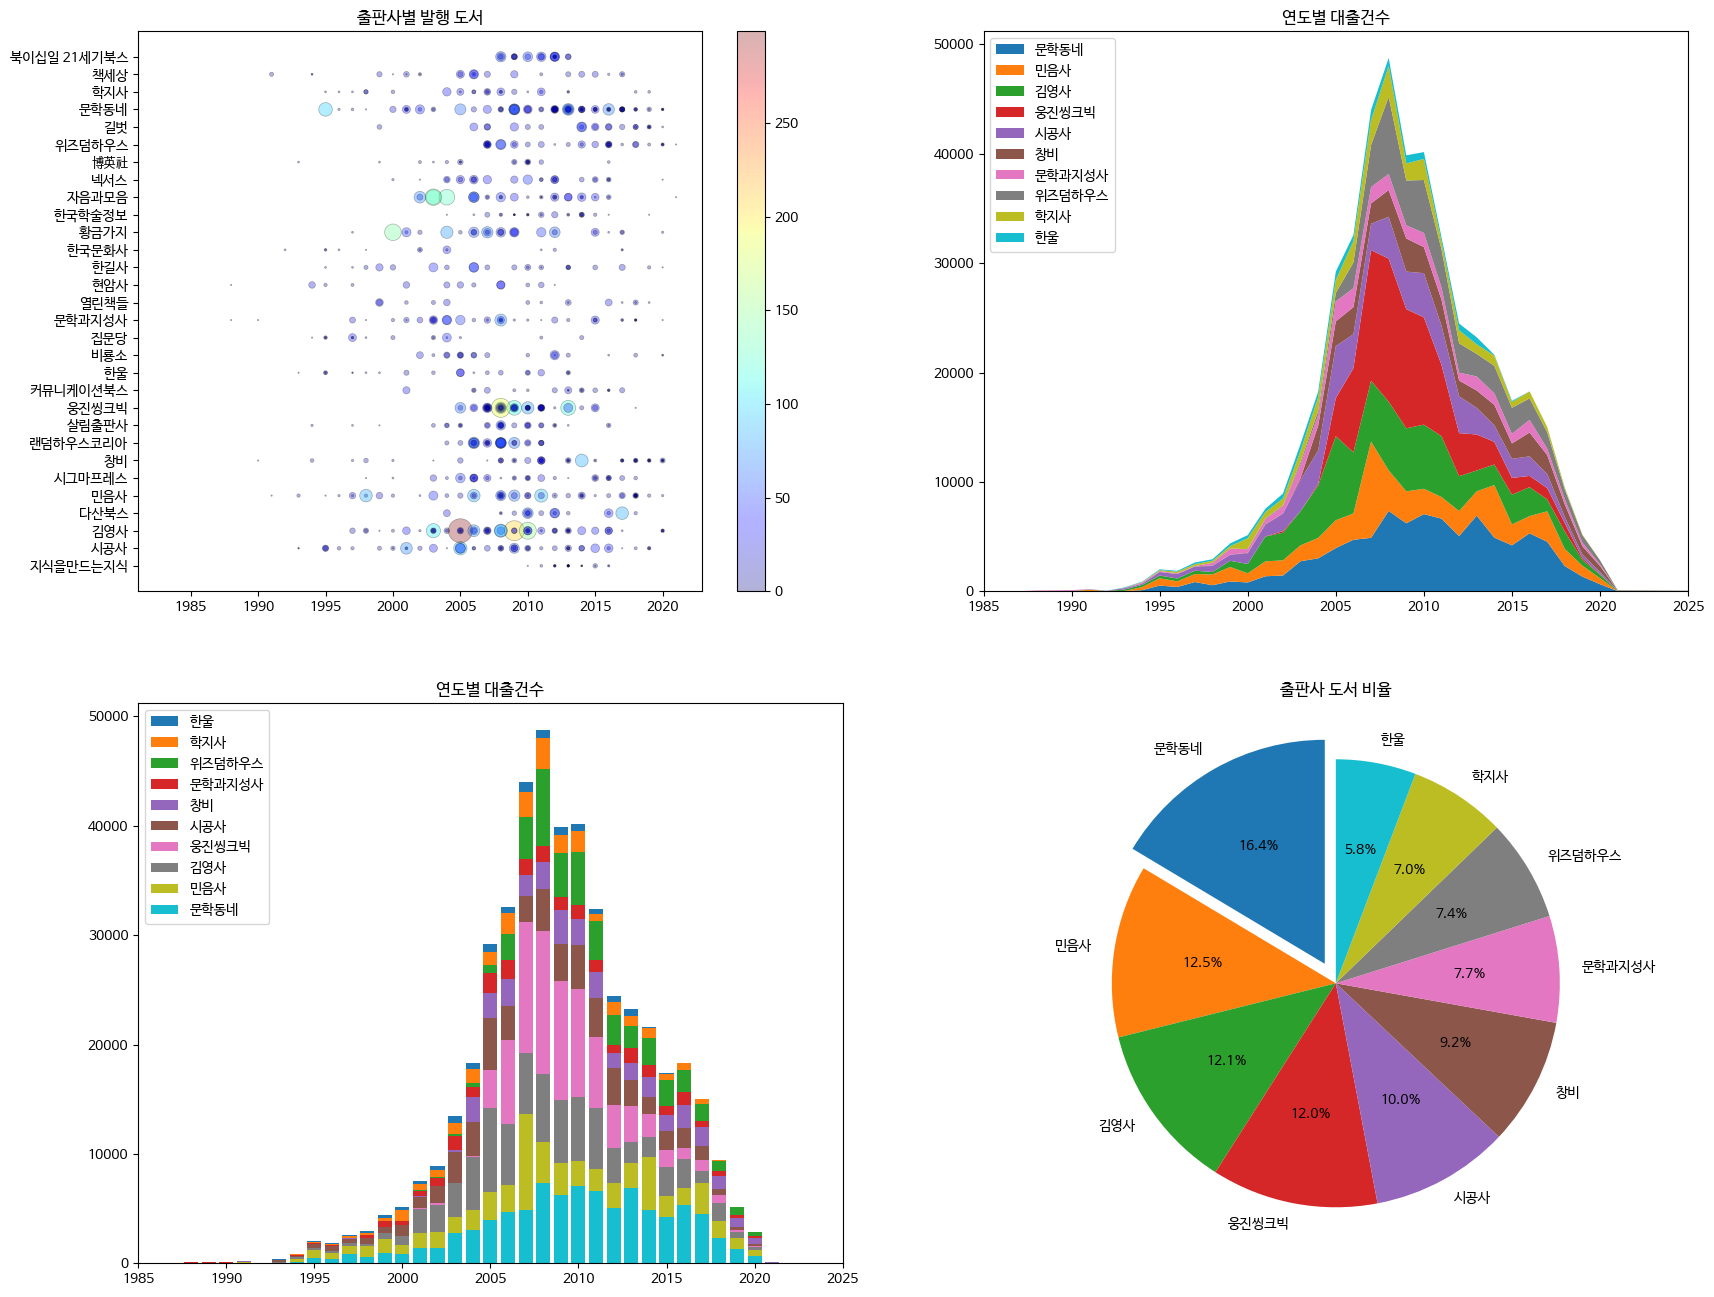

In [69]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 산점도
ns_book8 = ns_book7[top30_pubs_idx].sample(1000, random_state=42)
sc = axes[0, 0].scatter(ns_book8['발행년도'], ns_book8['출판사'],\
                        linewidths=0.5, edgecolors='k', alpha=0.3,\
                        s=ns_book8['대출건수'], c=ns_book8['대출건수'],\
                        cmap='jet')
axes[0, 0].set_title('출판사별 발행 도서')
fig.colorbar(sc, ax=axes[0, 0])

# 스택 영역 그래프
axes[0, 1].stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0), labels=top10_pubs)
axes[0, 1].set_title('연도별 대출건수')
axes[0, 1].legend(loc='upper left')
axes[0, 1].set_xlim(1985, 2025)

# 스택 막대 그래프
for i in reversed(range(len(ns_book12))):
  bar = ns_book12.iloc[i]  # 행 추출
  label = ns_book12.index[i]  # 출판사 이름 추출
  axes[1, 0].bar(year_cols, bar, label=label)
axes[1, 0].set_title('연도별 대출건수')
axes[1, 0].legend(loc='upper left')
axes[1, 0].set_xlim(1985, 2025)

# 원 그래프
axes[1, 1].pie(data, labels=labels, startangle=90,\
               autopct='%.1f%%', explode=[0.1]+[0]*9)
axes[1, 1].set_title('출판사 도서 비율')

fig.savefig('all_in_one.png')
fig.show()